In [3]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
model = YOLO("/content/drive/MyDrive/SmartVision_Project/smartvision_yolo/weights/best.pt")
print("YOLO model loaded ✔️")

YOLO model loaded ✔️


Upload Image & Detect Objects

Saving geo tag image .jpeg to geo tag image .jpeg

image 1/1 /content/geo tag image .jpeg: 640x512 2 persons, 1 car, 749.4ms
Speed: 16.0ms preprocess, 749.4ms inference, 46.5ms postprocess per image at shape (1, 3, 640, 512)


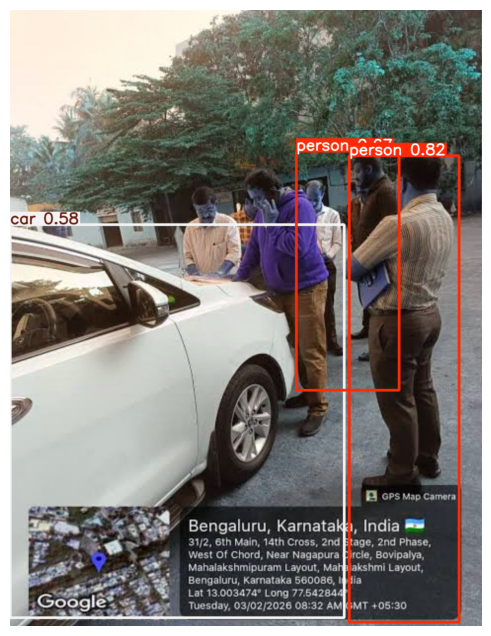

In [9]:
from google.colab import files
uploaded = files.upload()

# Get uploaded image name
img_path = list(uploaded.keys())[0]

# Run detection
results = model.predict(img_path, conf=0.5, save=False)

# Show result
for r in results:
    img = r.plot()
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Post-processing Improvements

- Confidence filtering (>50%)
- Clean label formatting

Improved Final Detection Cell

Saving dogs.jpg to dogs.jpg

image 1/1 /content/dogs.jpg: 384x640 3 dogs, 423.8ms
Speed: 3.6ms preprocess, 423.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

Detected Objects:

dog  →  0.87
dog  →  0.63
dog  →  0.63


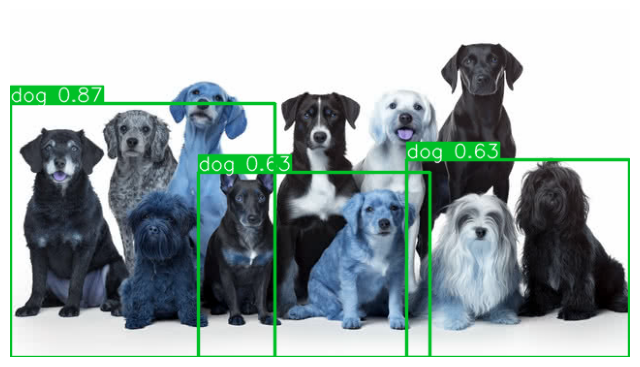

In [12]:
from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]

results = model.predict(img_path, conf=0.5, save=False)

for r in results:
    img = r.plot()
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis("off")

    print("\nDetected Objects:\n")

    for box in r.boxes:
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        label = model.names[cls]

        if conf > 0.5:
            print(f"{label}  →  {conf:.2f}")

    plt.show()

Batch Image Prediction


image 1/1 /content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val/image_000028.jpg: 480x640 3 persons, 473.5ms
Speed: 2.2ms preprocess, 473.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


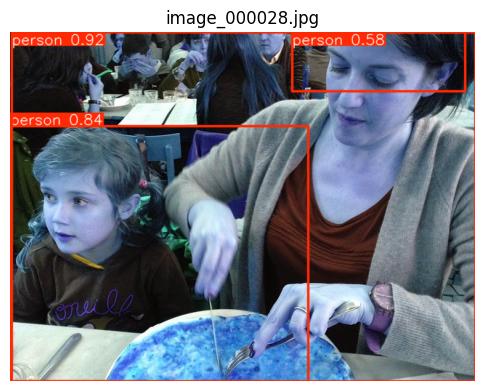

In [15]:
import os

folder = "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val"

for img in os.listdir(folder)[:1]:
    path = os.path.join(folder, img)
    results = model.predict(path, conf=0.5, save=False)

    for r in results:
        img_plot = r.plot()
        plt.figure(figsize=(6,6))
        plt.imshow(img_plot)
        plt.axis("off")
        plt.title(img)
        plt.show()

This shows model can handle multiple images automatically.